# R kernel

In [63]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(cowplot)
library(rstatix)
library(reshape2)
library(ggnewscale)
library(RColorBrewer)
})

In [2]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.1,0,0.1,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.1,0,0.1, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=6,color="black"),
    legend.title=element_text(size=6,color="black"),
    legend.key.width=unit(0.2,'cm'),
    legend.key.height=unit(0.2,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=5),
    #panel.border = element_rect(size=0.25,color="black"),
    panel.grid = element_blank()
)
}

## Fig.1C

In [152]:
Epi_thichness = read.csv("Epi_thickness.csv",head=T)
Epi_thichness$group = factor(Epi_thichness$group, levels=c('HC','DLE','SLE'))

In [168]:
stats = Epi_thichness %>%
    group_by(group) %>%
    summarise(mean = mean(Epi_thickness_um),
             sd = sd(Epi_thickness_um),
             sem = sd / sqrt(n()))

In [9]:
group_color = c('HC' = '#d05204', 'DLE' = '#019167', 'SLE' = '#0166aa')

In [170]:
mygg.gap <- function (plot, ylim, segments, tick_width, rel_heights, vjust = 0, 
          margin = c(top = 1, right = 2, bottom = 1, left = 1), ...) 
{
  if (!is.list(segments)) {
    segments = list(segments)
  }
  if (all(missing(ylim), is.null(plot$coordinates$limits$y))) {
    stop("ylim is undefined")
  }
  else if (ylim[1] == ylim[2]) {
    stop("ylim should not be the same number")
  }
  else if (missing(ylim)) {
    ylim = plot$coordinates$limits$y
  }
  for (j in 1:length(segments)) {
    seg1 = segments[[j]][1]
    seg2 = segments[[j]][2]
    if (seg1 > seg2) {
      if (ylim[1] < ylim[2]) {
        msg = paste0("No.", j, " segment: c(", 
                     seg1, ",", seg2, ") is wrong. It should be ", 
                     "c(", seg2, ",", seg1, ")")
        stop(msg)
      }
    }
    else if (seg1 < seg2) {
      if (ylim[1] > ylim[2]) {
        msg = paste0("No.", j, " segment: c(", 
                     seg1, ",", seg2, ") is wrong. It should be ", 
                     "c(", seg2, ",", seg1, ")")
        stop(msg)
      }
    }
    else if (seg1 == seg2) {
      msg = paste0("No.", j, " segment: c(", 
                   seg1, ",", seg2, ") is wrong. tick_width should not be equal")
      stop(msg)
    }
  }
  if (length(segments) >= 2) {
    if (ylim[1] < ylim[2]) {
      for (k in 2:length(segments)) {
        pre.2 = segments[[k - 1]][2]
        suf.1 = segments[[k]][1]
        if (pre.2 > suf.1) {
          pre = paste0("c(", segments[[k - 1]][1], 
                       ",", segments[[k - 1]][2], ")")
          suf = paste0("c(", segments[[k]][1], 
                       ",", segments[[k]][2], ")")
          msg = paste0("Segments ", k - 1, " and ", 
                       k, ": ", pre, ",", suf, " are wrong. They should be ", 
                       suf, ",", pre)
          stop(msg)
        }
      }
    }
    else if (ylim[1] > ylim[2]) {
      for (k in 2:length(segments)) {
        pre.2 = segments[[k - 1]][2]
        suf.1 = segments[[k]][1]
        if (pre.2 < suf.1) {
          pre = paste0("c(", segments[[k - 1]][1], 
                       ",", segments[[k - 1]][2], ")")
          suf = paste0("c(", segments[[k]][1], 
                       ",", segments[[k]][2], ")")
          msg = paste0("Segments ", k - 1, " and ", 
                       k, ": ", pre, ",", suf, " are wrong. They should be ", 
                       suf, ",", pre)
          stop(msg)
        }
      }
    }
  }
  if (ylim[1] < ylim[2]) {
    if (min(unlist(segments)) <= ylim[1]) 
      stop("the minimum of segments must be more than the minium of ylim")
    if (max(unlist(segments)) > ylim[2]) 
      stop("the maximum of segments must be lower than maximum of ylim")
  }
  else if (ylim[1] > ylim[2]) {
    if (min(unlist(segments)) <= ylim[2]) 
      stop("the minimum of segments must be more than the minium of ylim")
    if (max(unlist(segments)) > ylim[1]) 
      stop("the maximum of segments must be lower than maximum of ylim")
  }
  if (missing(tick_width)) {
    tick_width = rep(abs(ylim[2] - ylim[1])/10, (length(segments) + 
                                                   1))
  }
  if ((length(tick_width) - length(segments)) < 1) {
    int_len = length(tick_width)
    for (m in (int_len + 1):(length(segments) + 1)) {
      tick_width[m] = tick_width[int_len]
    }
  }
  seg_heights = 0
  y_heights = 1
  if (length(seg_heights) < length(segments)) {
    seg_heights_len = length(seg_heights)
    for (m in (seg_heights_len + 1):length(segments)) {
      seg_heights[m] = seg_heights[seg_heights_len]
    }
  }
  if (length(y_heights) < (length(segments) + 1)) {
    y_heights_len = length(y_heights)
    for (m in (y_heights_len + 1):(length(segments) + 1)) {
      y_heights[m] = y_heights[y_heights_len]
    }
  }
  if (length(plot$scales$scales) == 0) {
    trans = "identity"
  }
  else if ("trans" %in% names(plot$scales$scales[[1]])) {
    trans = plot$scales$scales[[1]]$trans
  }
  else {
    trans = "identity"
  }
  if ("reverse" %in% trans) {
    if (ylim[1] < ylim[2]) {
      msg = paste0("ylim: ", "c(", ylim[1], 
                   ",", ylim[2], ")", " is wrong. It should be ", 
                   "c(", ylim[2], ",", ylim[1], ")")
      stop(msg)
    }
  }
  if ("identity" %in% trans) {
    if (ylim[1] > ylim[2]) {
      msg = paste0("ylim: ", "c(", ylim[1], 
                   ",", ylim[2], ")", " is wrong. It should be ", 
                   "c(", ylim[2], ",", ylim[1], ")")
      stop(msg)
    }
  }
  for (i in 1:length(segments)) {
    gap = unlist(segments[i])
    if (i == 1) {
      if (ylim[1] < ylim[2]) {
        breaks = seq(ylim[1], gap[1], by = tick_width[i])
      }
      else if (ylim[1] > ylim[2]) {
        breaks = seq(gap[1], ylim[1], by = tick_width[i])
      }

      p_segment.i <- plot + coord_cartesian(ylim = c(ylim[1], gap[1])) + theme(panel.border = element_blank()) + 
        theme(#axis.line.y = element_line(), 
              axis.line.x.bottom = element_line(), 
              plot.title = element_blank(), legend.position = "none") + 
        scale_y_continuous(expand = c(0, 0), trans = trans, breaks = breaks) + ylab(label = NULL)
  
      p_segment = list(p_segment.i)
      names(p_segment)[length(p_segment)] = i
      rel_heigh = c(y_heights[i], seg_heights[i])
    }
    else {
      if (ylim[1] < ylim[2]) {
        breaks = seq(ylim[1], gap[1], by = tick_width[i])
      }
      else if (ylim[1] > ylim[2]) {
        breaks = seq(gap[1], ylim[1], by = tick_width[i])
      }
      p_segment.i <- plot + coord_cartesian(ylim = c(unlist(segments[i - 1])[2], gap[1])) + 
        theme(panel.border = element_blank()) + 
        theme(#axis.line.y = element_line(), 
              legend.position = "none", 
              axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
              title = element_blank(), axis.title.x = element_blank()) + 
        scale_y_continuous(expand = c(0, 0), breaks = breaks, trans = trans) + ylab(label = NULL)  
      p_segment = c(p_segment, list(NULL), list(p_segment.i))
      names(p_segment)[length(p_segment)] = i
      rel_heigh = c(rel_heigh, y_heights[i], seg_heights[i])
    }
    if (i == length(segments)) {
      if (ylim[1] < ylim[2]) {
        breaks = seq(gap[2], ylim[2], by = tick_width[i + 1])
      }
      else if (ylim[1] > ylim[2]) {
        breaks = seq(ylim[2], gap[2], by = tick_width[i + 1])
      }
      p_segment.i <- plot + coord_cartesian(ylim = c(gap[2], ylim[2])) + theme(panel.border = element_blank()) + 
        theme(#axis.line.y = element_line(), 
              axis.line.x.top = element_line(), 
              legend.position = "none", axis.text.x = element_blank(), 
              axis.ticks.x = element_blank(), axis.title.x = element_blank()) + 
        scale_y_continuous(expand = c(0, 0), breaks = breaks, trans = trans) + ylab(label = NULL) 
      p_segment = c(p_segment, list(NULL), list(p_segment.i))
      names(p_segment)[length(p_segment)] = i + 1
      rel_heigh = c(rel_heigh, y_heights[i])
    }
  }
 
  
  num_parts <- length(p_segment)
  sbt <- p_segment[[1]]$labels$subtitle
  
  p_segment <- purrr::map(p_segment, ~ if(is.ggplot(.)) {.+labs(subtitle=NULL)} else {NULL})
  
  p_segment = rev(p_segment)
  
  p_segment[[1]]$labels$subtitle <- sbt
  
  if (missing(rel_heights)) {
    rel_heights = rev(rel_heigh)
  }
  else {
    rel_heights = rev(rel_heights)
  }
  if (is.null(plot$theme$axis.title.y$angle)) {
    angle = 90
  }
  else {
    angle = plot$theme$axis.title.y$angle
  }
  plot_grid(plotlist = p_segment, ncol = 1, align = "v", rel_heights = rel_heights) + 
        theme(plot.margin = unit(margin, "cm")) + 
        draw_label(label = plot$labels$y, x = 0, 
          hjust = plot$theme$axis.title.y$hjust, vjust = vjust, 
          fontfamily = plot$theme$axis.title.y$family, fontface = plot$theme$axis.title.y$face, 
          size = plot$theme$axis.title.y$size, angle = angle, lineheight = plot$theme$axis.title.y$lineheight, 
          colour = plot$theme$axis.title.y$colour)
}

In [171]:
test_result = Epi_thichness %>% dunn_test(Epi_thickness_um ~ group)
test_result$p.format = sprintf("%.3f", test_result$p.adj)
test_result <- test_result %>% mutate(y.position = c(360, 400, 420))

In [172]:
plot = ggplot(Epi_thichness, aes(x=group,y=Epi_thickness_um,color=group)) +
    stat_boxplot( geom = "errorbar", width=0.4, linewidth=0.25) +
    geom_boxplot(outlier.shape = NA, size=0.25) +  #outlier.shape = NA
    geom_jitter(size=1,width=0.2,color='black',alpha=1,shape=19, stroke=NA) +
    stat_pvalue_manual(test_result, label = "p.format", label.size=2, hide.ns=T, bracket.size=0.25, tip.length = 0.02) +
    labs(x="",y='Epi thickness (um)') +
    scale_y_continuous(limits = c(0,450)) +
    scale_color_manual(values=group_color) +
    mytheme() +
    theme(legend.position = 'none')

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


png 
  2

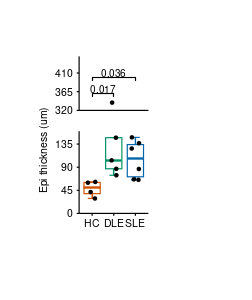

In [173]:
options(repr.plot.width =2.1,repr.plot.height =2.5)
mygg.gap(plot=plot,
       segments=c(160,320),
       ylim=c(0,450),
        rel_heights= c(0.7,0.001,0.4)) 

pdf("../../figures/Epi_thickness.pdf", w=2.1, h=2.5)
mygg.gap(plot=plot,
       segments=c(160,320),
       ylim=c(0,450),
        rel_heights= c(0.7,0.001,0.4)) 
dev.off()

## Fig.1H

In [174]:
cell_density = read.csv("Cell_density.csv",head=T, check.names = F)
cell_density$group = factor(cell_density$group, levels=c('HC','DLE','SLE'))
cell_density$Region = factor(cell_density$Region, levels=c('All','Epi','Der'))

In [182]:
test_result = cell_density_Epi_Der %>%
  as.data.frame() %>%
  setNames(make.names(names(.), TRUE)) %>%
  group_by(Region) %>%
  dunn_test(cell_density_mm2 ~ group)
test_result$p.format = sprintf("%.3f", test_result$p.adj)
test_result <- test_result %>% mutate(y.position = rep(c(8000, 9600, 9600), times = 2))

png 
  2

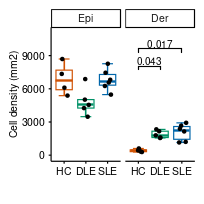

In [184]:
plot = ggplot(cell_density_Epi_Der, aes(x=group,y=cell_density_mm2,color=group)) +
stat_boxplot( geom = "errorbar", width=0.5, linewidth=0.25) +
geom_boxplot(outlier.shape = NA,size=0.25) +  #outlier.shape = NA
geom_jitter(size=1,width=0.2,color='black',alpha=1,shape=19, stroke=NA) +
facet_wrap(.~Region) +
stat_pvalue_manual(test_result, label = "p.format", label.size=2, hide.ns=T, bracket.size=0.25, tip.length = 0.03) +
labs(x="",y='Cell density (mm2)') +
scale_y_continuous(limits = c(0,11000)) +
scale_color_manual(values=group_color) +
mytheme() + 
theme(legend.position = 'none',    
    strip.text.x = element_text(size = 6,margin = margin(0.07,0,0.07,0, "cm")), 
    strip.background=element_rect(size=0.25, color='black', fill="white"),
    panel.border = element_blank()
)

options(repr.plot.width =1.7,repr.plot.height =1.7)
plot

pdf("../../figures/Cell_density.pdf", w=1.7, h=1.7)
plot 
dev.off()

## Fig.1I

In [23]:
celltype_order = c("Keratinocytes",'Melanocytes', 'Schwann cells','Sweat gland cells','Fibroblasts','Endothelial cells','Smooth muscle cells',
                'T cells','NK cells','B cells','Plasma cells','Macrophage/DC','Mast cells')

In [24]:
celltype_density = read.csv("Cell_density_celltype.csv",head=T, check.names = F)
celltype_density = subset(celltype_density, Region == 'All')
celltype_density$group = factor(celltype_density$group, levels=c('HC','DLE','SLE'))
celltype_density$celltype = factor(celltype_density$celltype, levels=celltype_order)

In [25]:
stat.test = celltype_density %>%
  as.data.frame() %>%
  setNames(make.names(names(.), TRUE)) %>%
  group_by(celltype) %>%
  dunn_test(cell_density_mm2 ~ group)
stat.test$p.format = sprintf("%.3f", stat.test$p.adj)
stat.test <- stat.test %>% add_xy_position(x='celltype',dodge=0.8)

stat.test <- stat.test %>%
  mutate(y.position = case_when(
    group1 == "HC" & group2 == "DLE" ~ log10(1000), 
    group1 == "HC" & group2 == "SLE" ~ log10(4500), 
    group1 == "DLE" & group2 == "SLE" ~ log10(10000)  
  ))

In [26]:
background_colors <- c("lightgray", "white","lightgray", "white","lightgray", "white","lightgray", "white","lightgray", "white","lightgray", "white","lightgray")
celltype_bg <- data.frame(
  celltype = levels(celltype_density$celltype),
  ymin = -Inf,
  ymax = Inf,
  xmin = 1:length(unique(celltype_density$celltype)) - 0.5,
  xmax = 1:length(unique(celltype_density$celltype)) + 0.5,
  bg_color = background_colors
)

In [27]:
y_min <- min(celltype_density$cell_density_mm2, na.rm = TRUE)

png 
  2

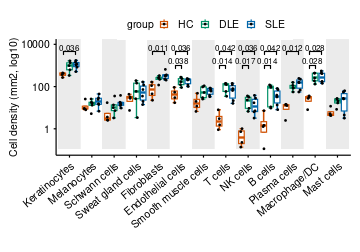

In [34]:
plot = ggplot() +
    geom_rect(data = celltype_bg,aes(xmin = xmin,xmax = xmax,ymin = y_min,ymax = Inf,fill = bg_color),alpha = 0.3,inherit.aes = FALSE, show.legend = F) +
    scale_fill_manual(values = c('gray' , 'white'),name=NULL)+
    new_scale_fill()+
    stat_boxplot(data = celltype_density, aes(x=celltype,y=cell_density_mm2,color=group), geom = "errorbar", width=0.5, linewidth=0.25, position=position_dodge(0.9)) +
    geom_boxplot(data = celltype_density, aes(x=celltype,y=cell_density_mm2,color=group), outlier.shape = NA,size=0.25, position=position_dodge(0.9)) + 
    geom_point(data = celltype_density, aes(x = celltype, y = cell_density_mm2, fill = group), size = 0.5, alpha = 1, shape = 19, stroke = NA, color = 'black',position = position_jitterdodge(jitter.width = 0.2, dodge.width = 0.9)) + 
    stat_pvalue_manual(stat.test,label = "p.format",label.size=1.6, bracket.size=0.25, tip.length = 0.03, hide.ns=TRUE) +
    labs(x="",y='Cell density (mm2, log10)') +
    scale_y_log10(
        limits = c(0.1, 10000),
        breaks = c(1, 100, 10000), 
        labels = c("1", "100", "10000")
    ) +
    coord_cartesian(ylim = c(0.1, 10000)) +
    scale_color_manual(values=group_color) +
    mytheme() + 
    theme(axis.text.x = element_text(size=6, color='black', angle=40, hjust=1, vjust=1),
        legend.position = 'top',    
        panel.border = element_blank()
    )

options(repr.plot.width =3,repr.plot.height =2.1)
plot

pdf('../../figures/Cell_density_celltype.pdf',w=3,h=2)
plot
dev.off()

## Fig.1J

In [35]:
gsva_score = read.csv("all_samples_hallmark_gsva.csv", head=T, row.names=1)

In [36]:
gsva_score_melt = melt(gsva_score)
gsva_score_melt$variable = sub("HALLMARK_", "", gsva_score_melt$variable)
gsva_score_melt$group_region = factor(gsva_score_melt$group_region, levels=rev(c('HC_Epi','DLE_Epi','SLE_Epi','HC_Der','DLE_Der','SLE_Der')))

Using sample, group_region as id variables



In [37]:
group_color = c('HC_Epi' = '#d05204','HC_Der' = '#FB9A99', 'DLE_Epi' = '#019167', 'DLE_Der' = '#B2DF8A', 'SLE_Epi' = '#0166aa', 'SLE_Der' = '#A6CEE3')

In [57]:
x_ranges = gsva_score_melt %>%
  group_by(variable) %>%
  summarise(
    xmin = as.numeric(sprintf("%0.1f",min(value, na.rm = TRUE))),
    xmax = as.numeric(sprintf("%0.1f",max(value, na.rm = TRUE)))
  )

png 
  2

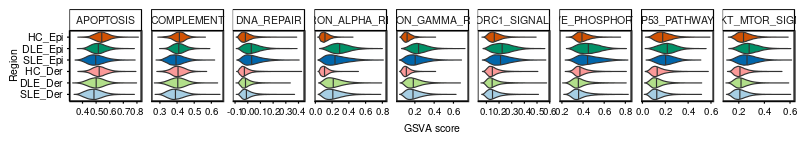

In [62]:
plot = ggplot(gsva_score_melt, aes(y=group_region,x=value,fill=group_region)) +
geom_violin(scale='width',lwd=0.25,draw_quantiles = 0.5) +
labs(x='GSVA score', y = 'Region') +
facet_wrap(.~variable, scales = 'free_x', nrow= 1) +
scale_fill_manual(values = group_color) +
mytheme() +
theme(legend.position='none',
        strip.text.x=element_text(margin = margin(0.1,0,0.1,0, "cm")),
        strip.background=element_rect(linewidth=0.25, color='black', fill="white"),
        panel.spacing = unit(0.2, "cm")
     )

options(repr.plot.width =6.7,repr.plot.height =1.2)
plot

pdf('../../figures/Cellbin_GSVA_score_violin.pdf',w=6.7,h=1.2)
plot
dev.off()

# Python kernel

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import matplotlib.backends.backend_pdf as pdf_backend
import importlib

import utils_20250718
importlib.reload(utils_20250718)
from utils_20250718 import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
celltype_order = ["Keratinocytes",'Melanocytes', 'Schwann cells','Sweat gland cells','Fibroblasts','Endothelial cells','Smooth muscle cells',
                'T cells','NK cells','B cells','Plasma cells','Macrophage/DC','Mast cells']

In [3]:
SC_adata = sc.read("../scRNA_harmony_subtype_for_cell2loc_20240823.h5ad")

In [7]:
SC_adata.obs['celltype'] = pd.Categorical(SC_adata.obs['celltype'], categories=celltype_order)

In [4]:
SC_adata.obs['celltype'] = pd.Categorical(SC_adata.obs['celltype'], categories=celltype_order)

In [3]:
ST_adata = sc.read_h5ad('/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Cellbin_h5ad_raw//All_samples_Cellbin_filter_gene200_add_anno_dist.h5ad')
sc.pp.normalize_total(ST_adata, target_sum=10000)
sc.pp.log1p(ST_adata)

In [4]:
ST_adata.obs['celltype'] = pd.Categorical(ST_adata.obs['celltype'], categories=celltype_order)

## Fig.1D

In [4]:
celltype_color = {
    "Keratinocytes" :"#CCFF00FF",
    "Melanocytes" : "#FF4A46",
    "Schwann cells" : "#A30059",
    "Sweat gland cells" : "#006FA6",
    "Fibroblasts" : "#8FB0FF",
    "Endothelial cells" :"#B79762",
    "Smooth muscle cells" :"#6B7900",
    "T cells" : "#63FFAC",
    "NK cells" : "#9467BD" ,
    "B cells" : "#FF34FF",
    "Plasma cells" :"#FF7F0EFF",
    "Macrophage/DC" : "#008941",
    "Mast cells" : "#6A3A4C"
}

[11:41:25] 📃  add palette for `celltype` to adata.uns                                       ]8;id=852706;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=550955;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

Text(0.5, 1.0, 'scRNA-seq (139,653)')

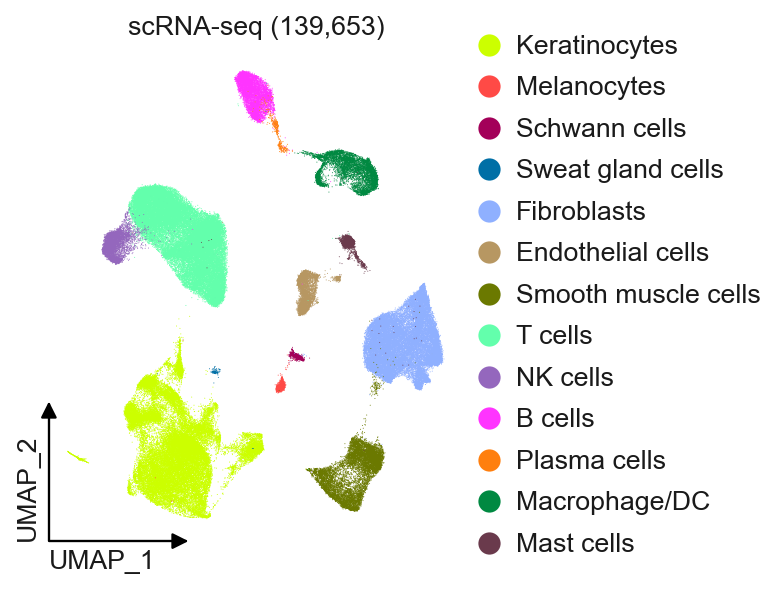

In [8]:
ax = dimplot(SC_adata, groupby="celltype", reduction='X_umap', arrow=True, palette=celltype_color)
ax.set_title(f"scRNA-seq ({format(SC_adata.obs.shape[0], ',')})")

## Fig.1E

/tmp/ipykernel_7470/2137828375.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sample_adata.obs['celltype'] = pd.Categorical(sample_adata.obs['celltype'], categories=celltype_order)


[11:49:48] ❕  ssat is not registered, register now                                           ]8;id=30620;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=766547;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=545197;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=835430;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

/tmp/ipykernel_7470/2137828375.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sample_adata.obs['celltype'] = pd.Categorical(sample_adata.obs['celltype'], categories=celltype_order)


[11:49:49] ❕  ssat is not registered, register now                                           ]8;id=538053;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=920327;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=525280;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=293351;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

/tmp/ipykernel_7470/2137828375.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sample_adata.obs['celltype'] = pd.Categorical(sample_adata.obs['celltype'], categories=celltype_order)


[11:49:50] ❕  ssat is not registered, register now                                           ]8;id=981690;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=147442;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=265141;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=879162;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

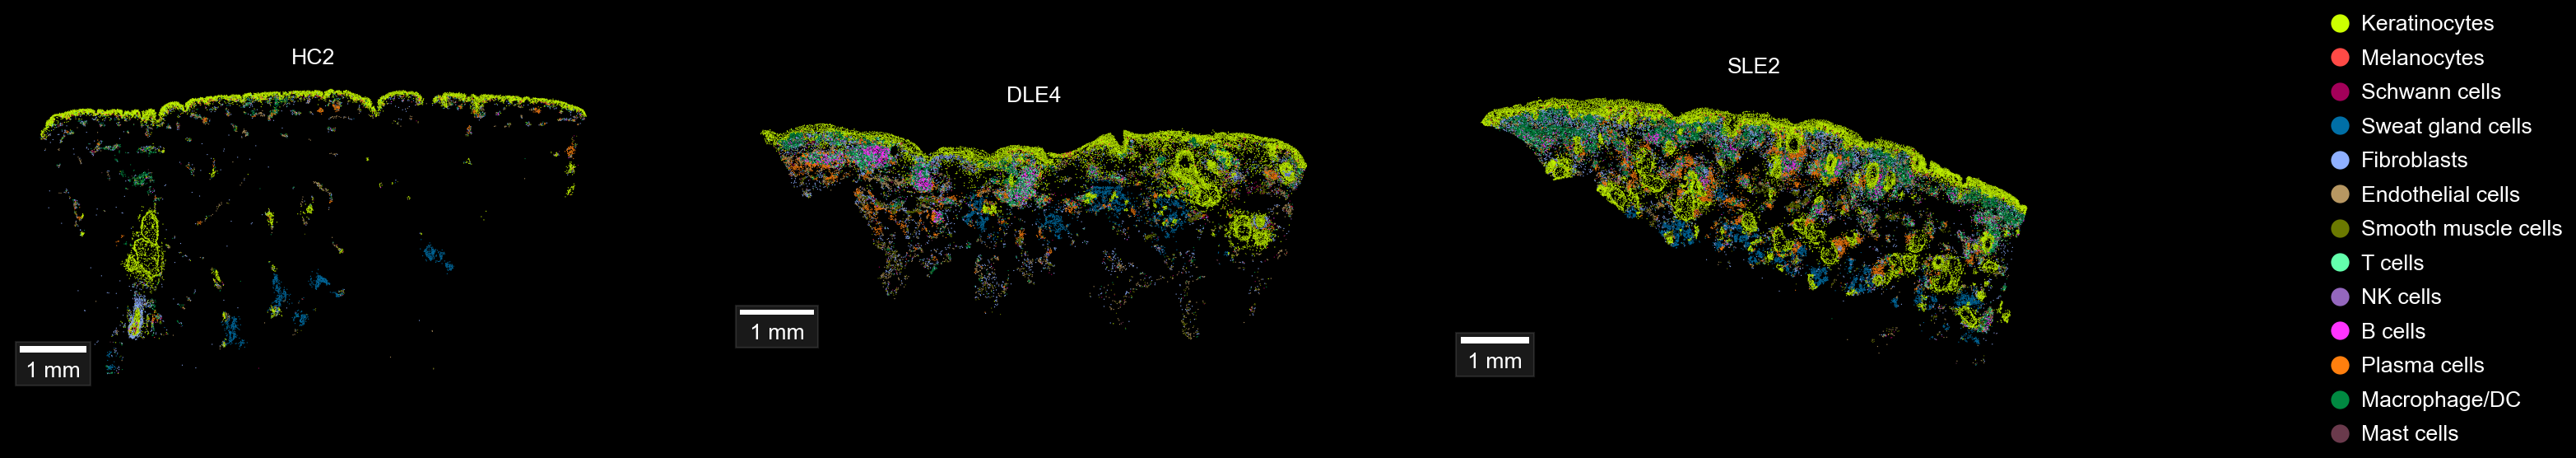

In [12]:
samples = ["HC2","DLE4","SLE2"] 

with mpl.style.context("dark_background"): 
    fig, axs =plt.subplots(figsize=(20, 4), ncols=3,nrows=1) 
    axs = axs.flatten()
    for i in range(0,len(samples)):
        sample_adata = ST_adata[ST_adata.obs['sample'] == samples[i]]
        sample_adata.obs['celltype'] = pd.Categorical(sample_adata.obs['celltype'], categories=celltype_order)
              
        ax = dimplot(sample_adata,background=True,groupby="celltype", reduction="spatial", dot_size=10,legend=False,ax=axs[i], palette=celltype_color) #
        ax.set_title(f'{samples[i]}')
        draw_scalebar(ax=ax, color='white',location='lower left')
    plot_legend(fig=fig)
    for ax in axs:
        ax.axis('off')

## Fig.1G

HC2


/tmp/ipykernel_7470/3078491907.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sample_adata.obs['celltype'] = pd.Categorical(sample_adata.obs['celltype'], categories=celltype_order)


[11:49:22] ❕  ssat is not registered, register now                                           ]8;id=645013;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=500557;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=558111;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=937718;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=235274;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=23701;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=136320;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=870062;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=501078;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=479995;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

[11:49:23] 📃  add palette for `celltype` to adata.uns                                       ]8;id=525688;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=434134;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=389132;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=744209;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=513944;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=570027;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=257882;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=813981;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=206002;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=932736;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=171001;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=591653;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=812926;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=768588;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=998187;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=807901;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=350662;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=807839;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

DLE4


/tmp/ipykernel_7470/3078491907.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sample_adata.obs['celltype'] = pd.Categorical(sample_adata.obs['celltype'], categories=celltype_order)


[11:49:25] ❕  ssat is not registered, register now                                           ]8;id=682466;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=769196;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=22469;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=75989;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=57732;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=77400;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=781268;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=14183;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=106973;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=612078;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

[11:49:26] 📃  add palette for `celltype` to adata.uns                                       ]8;id=847388;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=872393;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=632294;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=787238;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=404303;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=699044;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

[11:49:27] 📃  add palette for `celltype` to adata.uns                                       ]8;id=236365;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=899201;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=976603;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=166926;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=701311;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=132515;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=964105;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=525052;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

[11:49:28] 📃  add palette for `celltype` to adata.uns                                       ]8;id=638225;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=901897;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=541061;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=525332;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

SLE2


/tmp/ipykernel_7470/3078491907.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sample_adata.obs['celltype'] = pd.Categorical(sample_adata.obs['celltype'], categories=celltype_order)


[11:49:30] ❕  ssat is not registered, register now                                           ]8;id=815607;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=241782;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=912423;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=565435;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

[11:49:31] 📃  add palette for `celltype` to adata.uns                                       ]8;id=842011;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=386996;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=74132;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=316392;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=939792;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=812145;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

[11:49:32] 📃  add palette for `celltype` to adata.uns                                       ]8;id=461698;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=530229;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=793506;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=964192;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

[11:49:33] 📃  add palette for `celltype` to adata.uns                                       ]8;id=784349;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=845123;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=261096;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=124054;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

[11:49:34] 📃  add palette for `celltype` to adata.uns                                       ]8;id=434738;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=282055;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=68987;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=704476;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=846291;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=399431;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

[11:49:35] 📃  add palette for `celltype` to adata.uns                                       ]8;id=123264;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=637994;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

[11:49:36] 📃  add palette for `celltype` to adata.uns                                       ]8;id=380507;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py\utils_20250718.py]8;;\:]8;id=251935;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure1/utils_20250718.py#1526\1526]8;;\

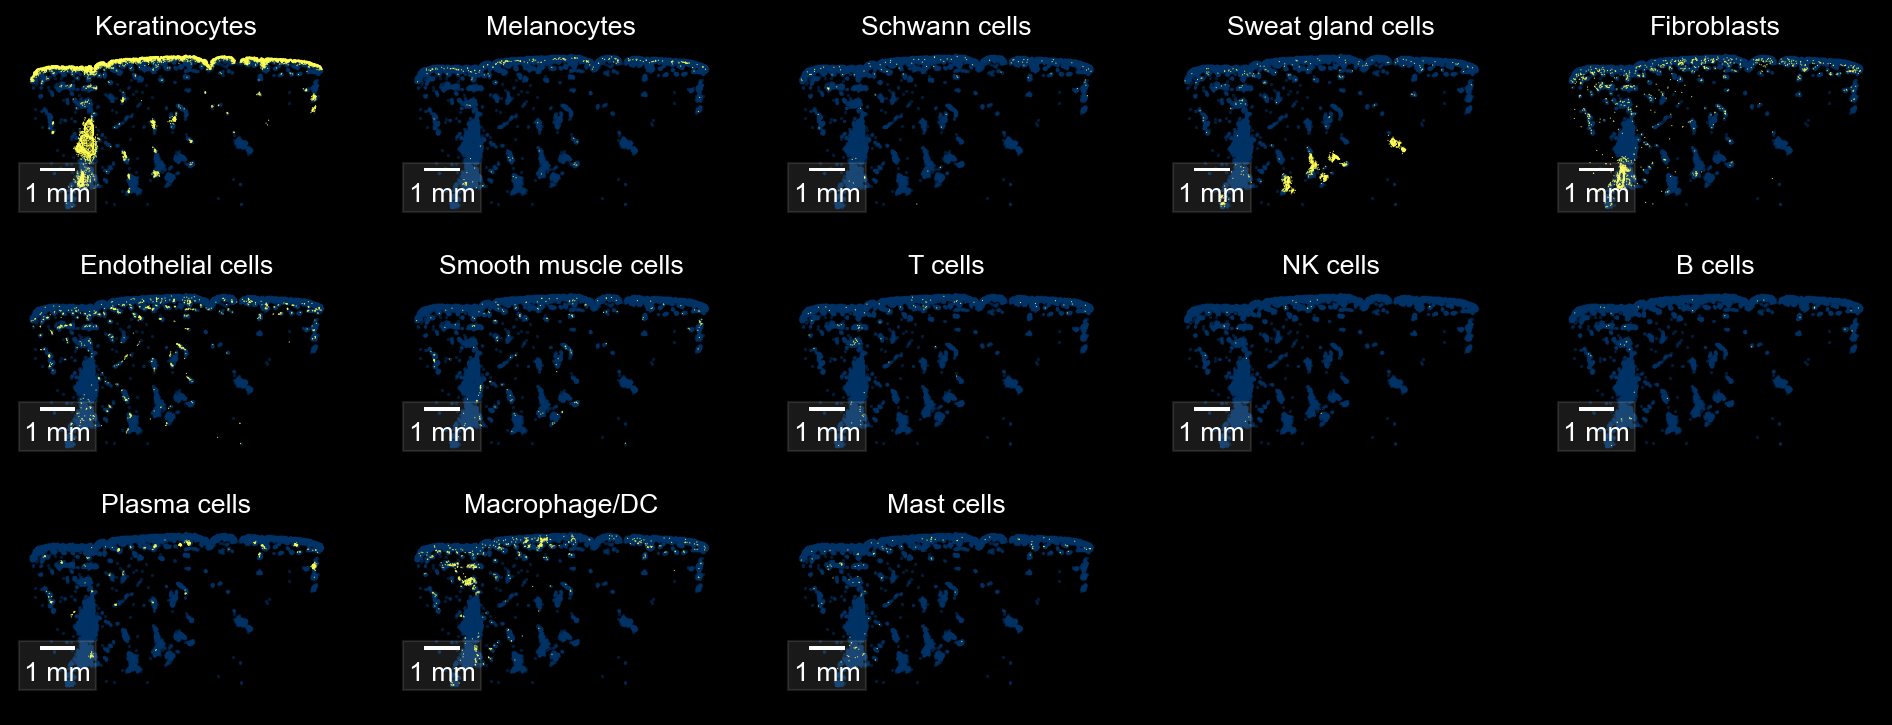

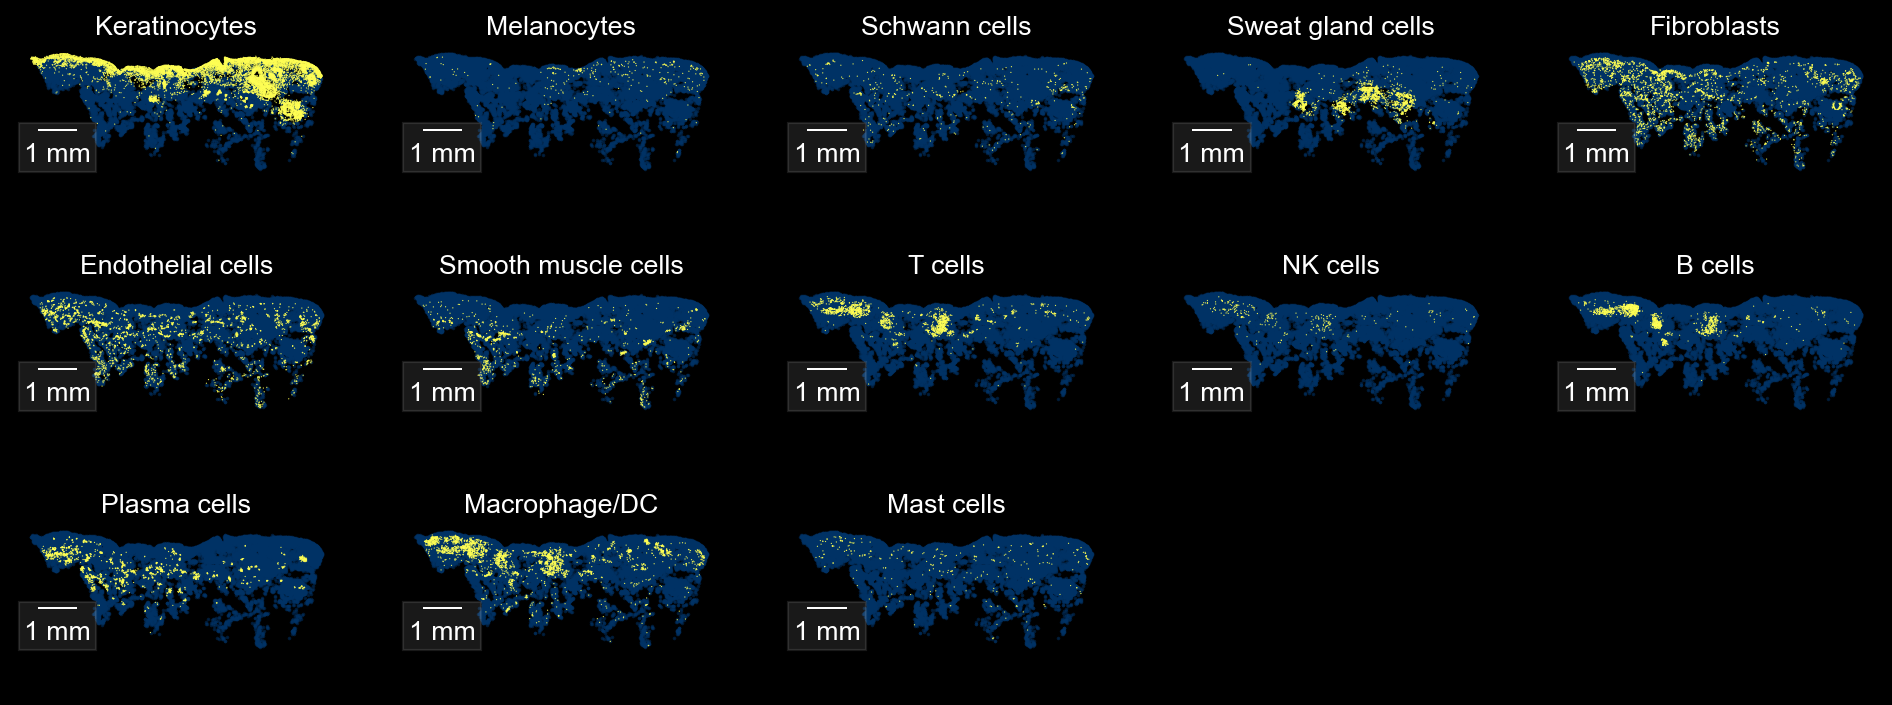

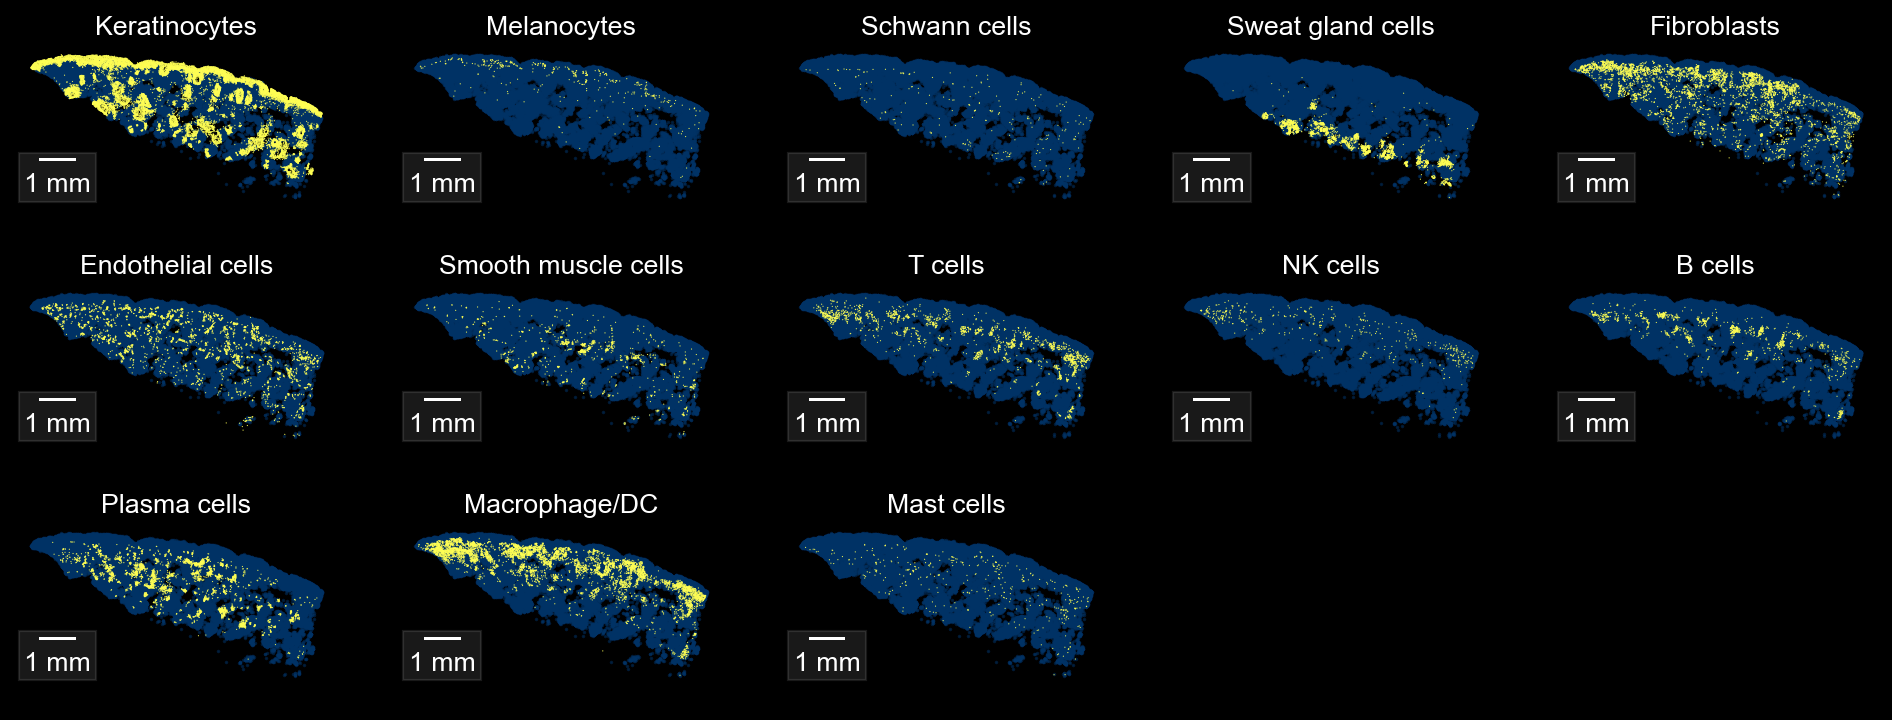

In [11]:
samples = ["HC2","DLE4","SLE2"]
with mpl.style.context("dark_background"): 
    for i in range(0,len(samples)):
        print (samples[i])
        sample_adata = ST_adata[ST_adata.obs['sample'] == samples[i]]
        sample_adata.obs['celltype'] = pd.Categorical(sample_adata.obs['celltype'], categories=celltype_order)
                   
        fig, axs =plt.subplots(figsize=(15, 5.5), ncols=5,nrows=3) 
        axs = axs.flat
        for plots, cell in enumerate(celltype_order):
            ax = dimplot(sample_adata,background=True,groupby="celltype", order=[cell],reduction="spatial", dot_size=20, ax=axs[plots],legend=False,palette=["#ffff54"]) #
            ax.set_title(cell)
            draw_scalebar(ax=ax, color='white',location='lower left')
        for ax in axs:
            ax.axis('off')

In [18]:
marker_genes = ["KRT10","PMEL","CDH19","DCD","DCN","PECAM1","TAGLN","CD3E","GNLY","MS4A1","JCHAIN","LYZ","TPSAB1"]

In [19]:
SLE2_adata = ST_adata[ST_adata.obs['sample'] == 'SLE2']

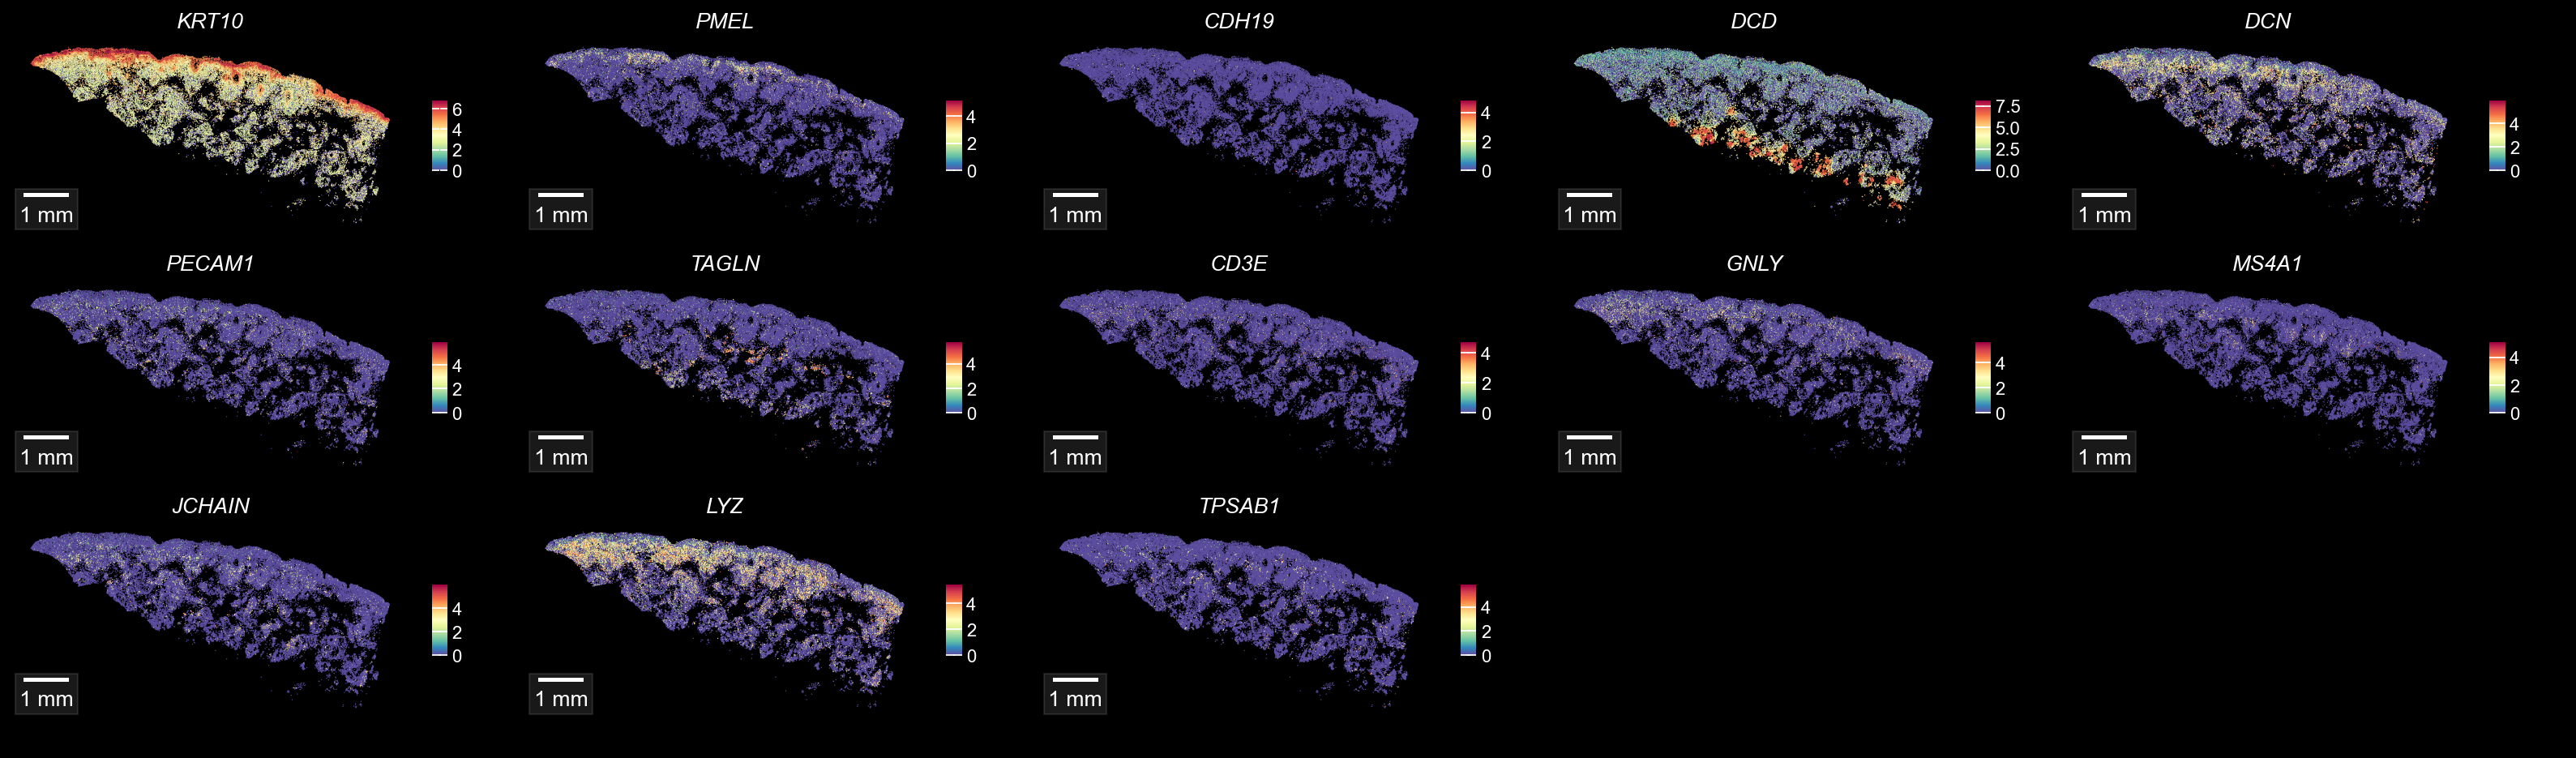

In [24]:
pdf_path = f"../../figures/Cellbin_celltype_markergene_expression.pdf"
pdf = pdf_backend.PdfPages(pdf_path)

rows, cols = 3, 5
fig = None
axs = None
plot_count = 0

for i in range(0,len(marker_genes)):

    if plot_count % (rows*cols) == 0:
        with mpl.style.context('dark_background'):
            if fig is not None:
                plt.tight_layout(pad=1.0)
                plt.close(fig)
            fig = plt.figure(figsize=(20, 6))
            axs = fig.subplots(rows, cols)
            axs = axs.ravel()   
    ax = axs[plot_count % (rows*cols)]
    
    featureplot(SLE2_adata, features=marker_genes[i], reduction='spatial', dot_size=100,ax=axs[i],style='dark_background')
    ax.set_title(f"{marker_genes[i]}")
    draw_scalebar(ax=ax, color='white',location='lower left')
    plot_count += 1

if fig is not None:
    for j in range(plot_count % (rows*cols), rows*cols):
        axs[j].axis('off')
    plt.tight_layout(pad=1.0)
    plt.show()

    pdf.savefig(fig, bbox_inches='tight',dpi=300)
    plt.close(fig)
pdf.close()

## Fig.1F

In [5]:
celltype_marker = [
    "KRT10","KRT1",
    "MLANA","DCT",
    "CDH19","MPZ",
    'DCD',"SCGB2A2",
    "DCN","COL1A1",
    "PECAM1","CLDN5",
    "TAGLN","MYL9",
    "CD3D","CD3E",
    "NKG7","GNLY",
    "MS4A1","CD79A",
    "JCHAIN","MZB1",
    "LYZ","AIF1",
    "TPSAB1","TPSB2"]

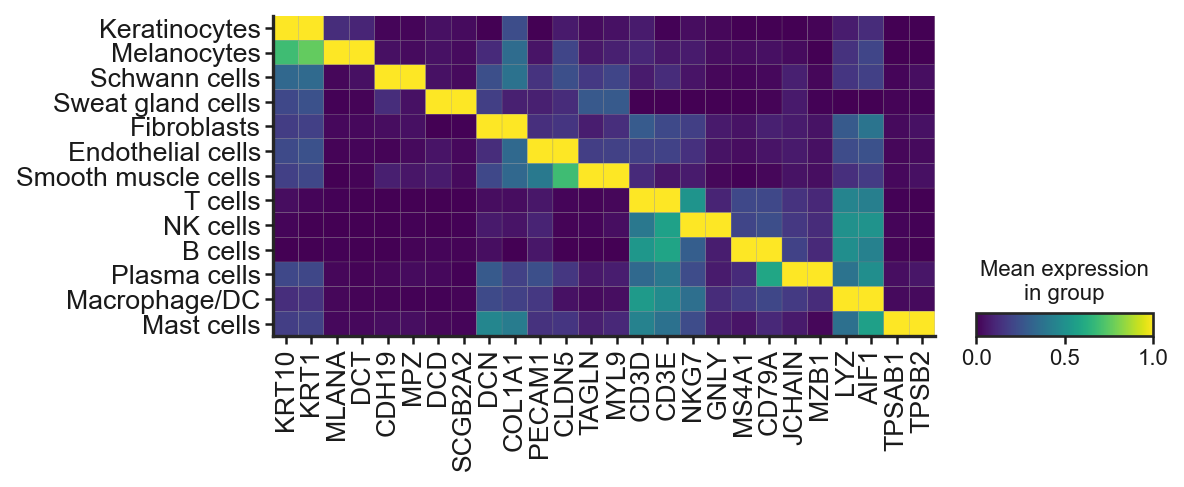

In [23]:
ax = sc.pl.matrixplot(ST_adata,celltype_marker, groupby='celltype',standard_scale='var',figsize=(7.1,2.6), cmap='viridis', swap_axes=False, return_fig=True)
main_ax = ax.get_axes()['mainplot_ax']
main_ax.tick_params(axis='both', labelsize=12)
#main_ax.figure.savefig("../../figures/matrixplot_Cellbin_markergene_heatmap.pdf", bbox_inches="tight")